## About this file

### Some relevant columns in the dataset:

#### Date - The date of the observation

#### AveragePrice - the average price of a single avocado

#### type - conventional or organic

#### year - the year

#### Region - the city or region of the observation

#### Total Volume - Total number of avocados sold

#### 4046 - Total number of avocados with PLU 4046 sold
#### (PLU. The product/price lookup code (PLU) uniquely identifies a product (mainly produce). The Hass Avocado Board focuses on six different PLUs: 4046: non-organic small/medium Hass Avocados (~3-5 oz) 4225: non-organic large Hass Avocados (~8-10 oz))
#### 4225 - Total number of avocados with PLU 4225 sold

#### 4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label

#### Your task is to make a mode that can consider the data provided and predict the Average Price.

In [346]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [347]:
df=pd.read_csv('C:/Users/User/Downloads/Avocado.csv')

# EDA

In [348]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16671,22,2017-07-30,2.29,28171.21,6085.95,8191.27,25.18,13868.81,1355.55,12513.26,0.00,organic,2017,Portland
5795,20,2017-08-13,1.51,70716.83,36652.25,3646.53,5544.33,24873.72,16648.41,8222.39,2.92,conventional,2017,Boise
8698,4,2018-02-25,0.67,1657524.28,855570.87,147837.21,3976.08,650140.12,544537.00,105365.34,237.78,conventional,2018,Houston
13562,17,2016-08-28,1.80,6294.99,2353.65,141.34,0.00,3800.00,3756.67,43.33,0.00,organic,2016,Orlando
6486,22,2017-07-30,1.36,222758.77,41369.26,115565.26,55.81,65768.44,64199.34,285.77,1283.33,conventional,2017,HarrisburgScranton


Unnamed: 0 seems to be a identifier column and needs to be removed.

In [349]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Dataframe have 3 columns with object type data, which we need to encode.

In [351]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [352]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

There are no constant or identifier column.

In [353]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###### There are no null values.

In [354]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

#### Data is higly skewed in almost all the columns.

In [355]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### All the columns have count equal to 18249. Mean and median have high difference except for Average price stating that data has high skewness present. There is high variance in all the columns except for Average price and year column. Difference between min, max and interquartile ranges is uneven hence there are a no. of outliers present in the data.

In [356]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

## Univariate Analysis

In [357]:
#We separate categorical and continuous features
catcol=['year','region','type']
cont=['Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

conventional    9126
organic         9123
Name: type, dtype: int64

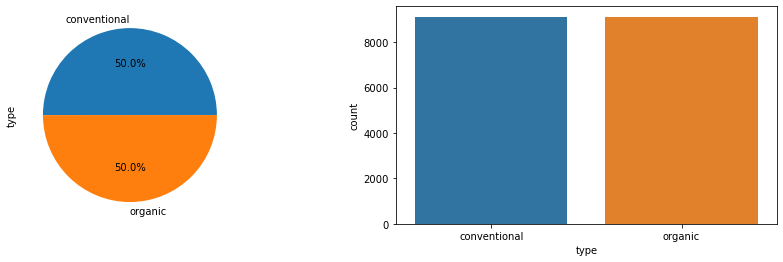

In [358]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

###### There two types organic and conventional are almost equal and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

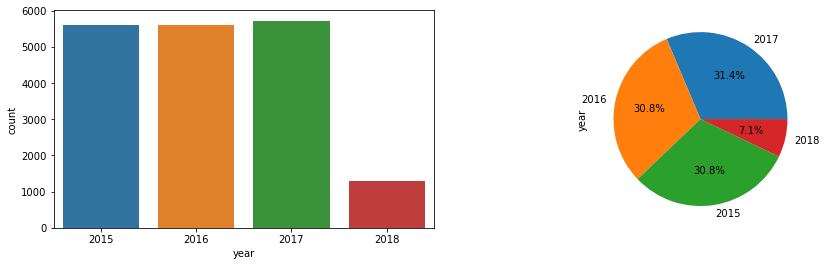

In [359]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(df['year'])
plt.subplot(1,2,2)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
df['year'].value_counts()

#### Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


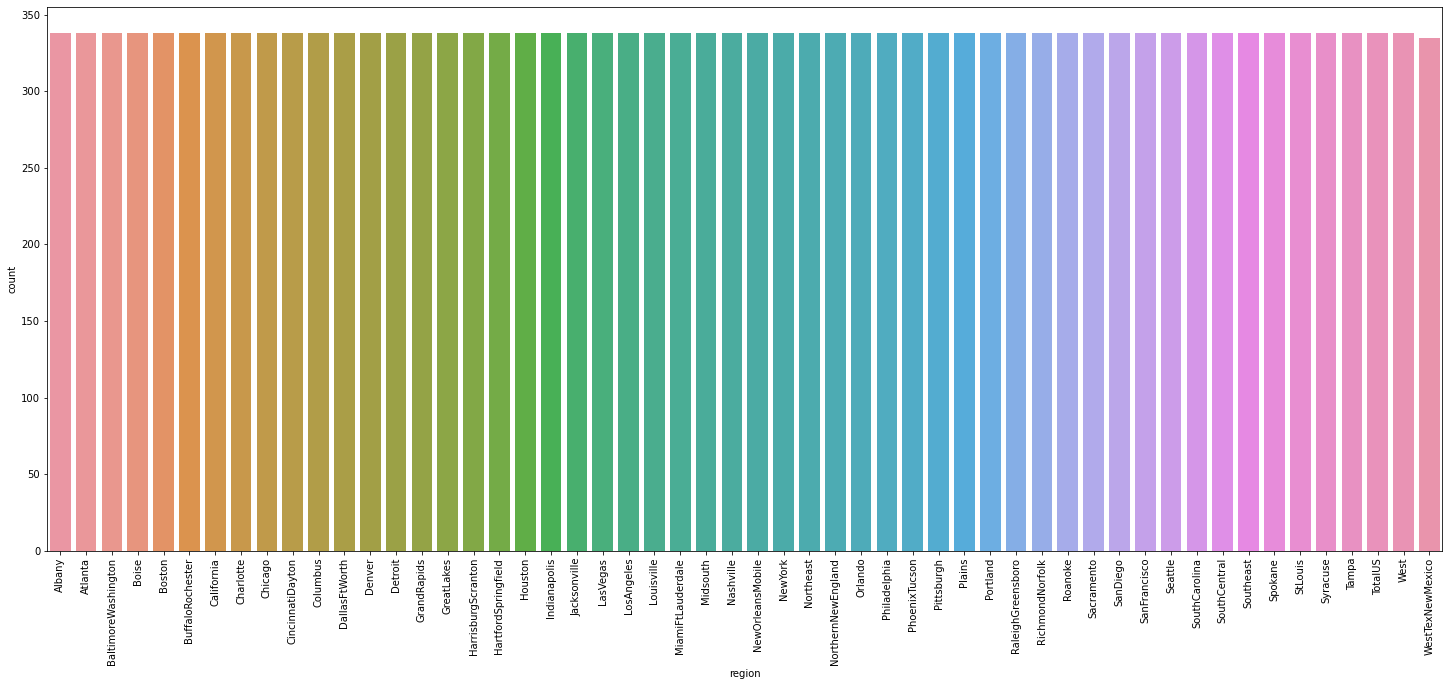

In [360]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

#### There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

Minimum 0.44
Maximum 3.25


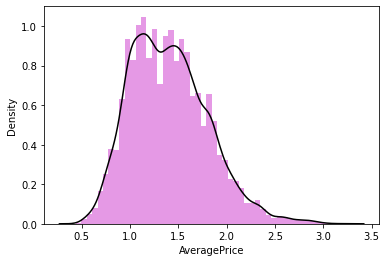

In [361]:
sns.distplot(df['AveragePrice'],color='m', kde_kws={"color": "k"})
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())

#### Average price of avacados little skewed, price ranging from 0.44 t0 3.25

## Biveriate Analysis

<AxesSubplot:title={'center':'Avocado Avarage price by type'}, xlabel='type', ylabel='AveragePrice'>

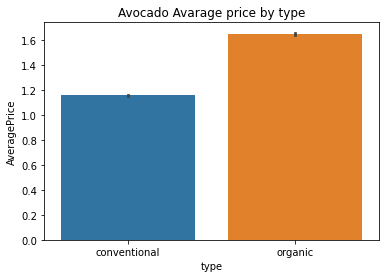

In [362]:
plt.title('Avocado Avarage price by type')
sns.barplot(x='type',y='AveragePrice',data=df)

##### Organic Avacoados are more expensive than the conventional ones.

<AxesSubplot:title={'center':'Total Volume by type'}, xlabel='type', ylabel='Total Volume'>

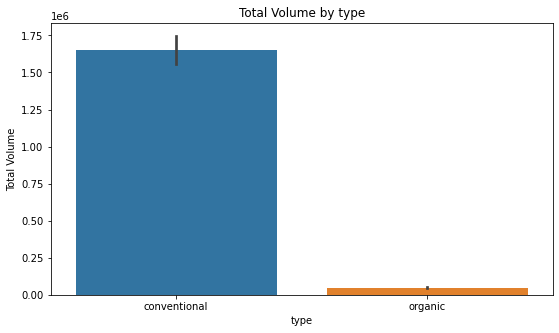

In [363]:
plt.figure(figsize=(9,5))
plt.title('Total Volume by type')
sns.barplot(x='type',y='Total Volume',data=df)

#### Toal volumes. types of bags, and PLU's are all high for convetional type of avocados, this states that although price of organic type is high but cnventional types of avocados are more produced.

#### 

## MultiVeriate Analysis

In [364]:
import plotly.express as px
data=df.groupby(['AveragePrice','year']).apply(lambda x:x['Total Volume'].count()).reset_index(name='Volume')
px.line(data,x='AveragePrice',y='Volume',color='year',title='Average Price of Avacados by Volume for year 2015 and 2016  ')

### Average price of avacado's for the year 2016 was way more than any other year, but highest volumes of avacado's were produced in 2015,reaching to a mark of 85, after that the produce of avocados seem to decrease. It is also to be noted that high volumes of avocados are sold at lower average price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

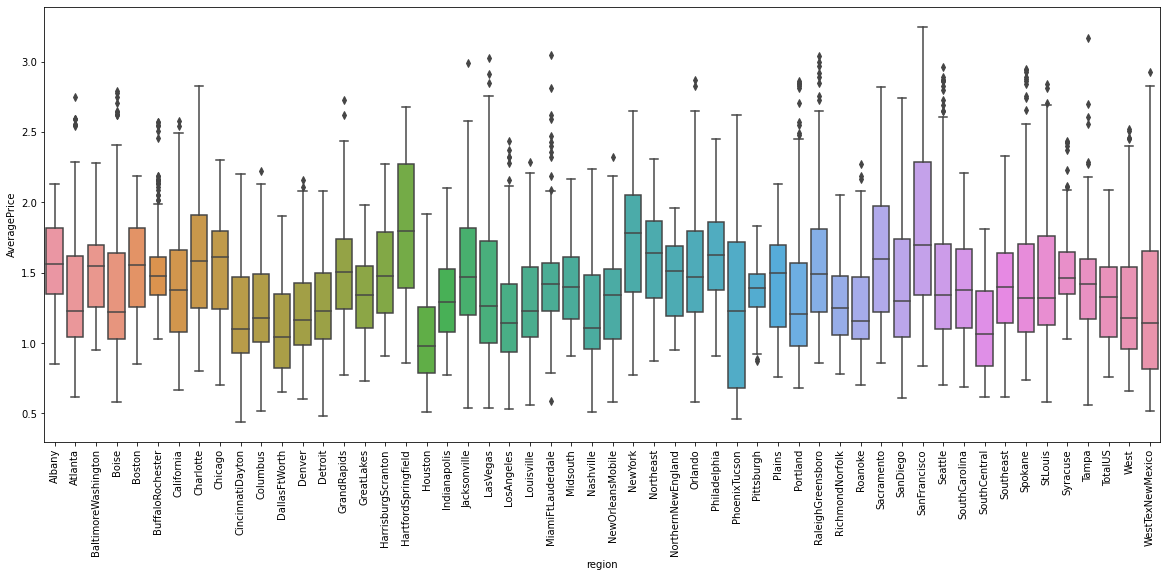

In [365]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)

#### Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

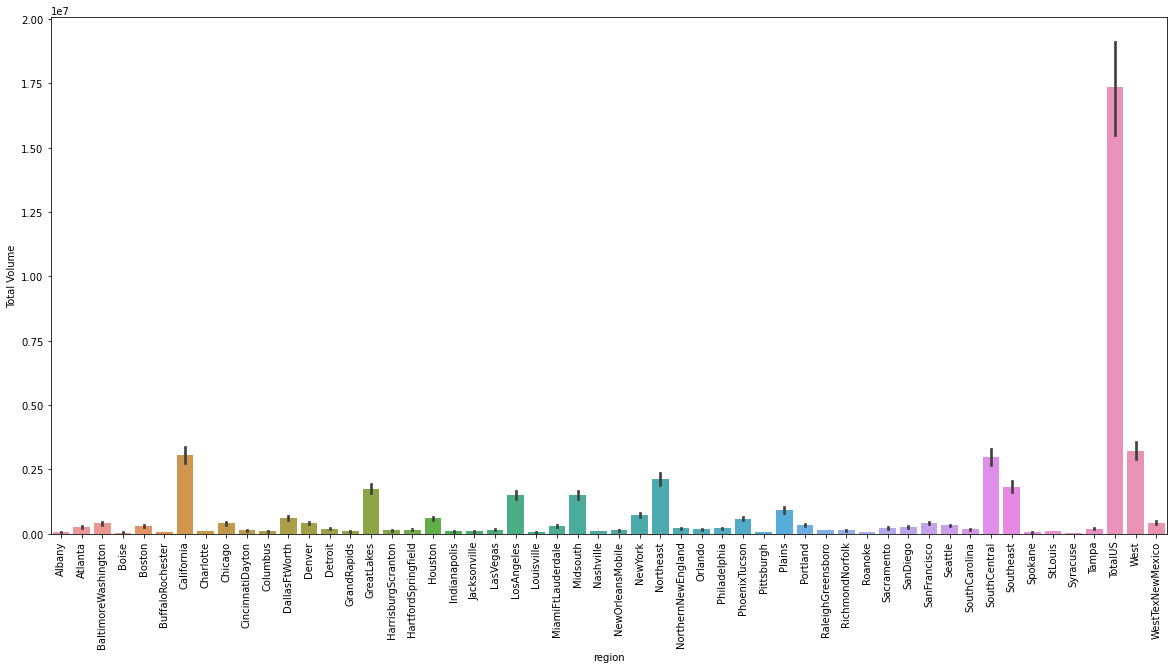

In [366]:
plt.figure(figsize=(20,9.5))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)

### Highest volumes of avacado's are found in the US. That could be the reason price of avacado's low there. As supply increases price decreases,whereas region with less volume such as las vegas have the highest price of avacado's.

In [367]:
#dropping unwanted column
df.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [368]:
df['Date']=pd.to_datetime(df['Date'])

In [369]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [370]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

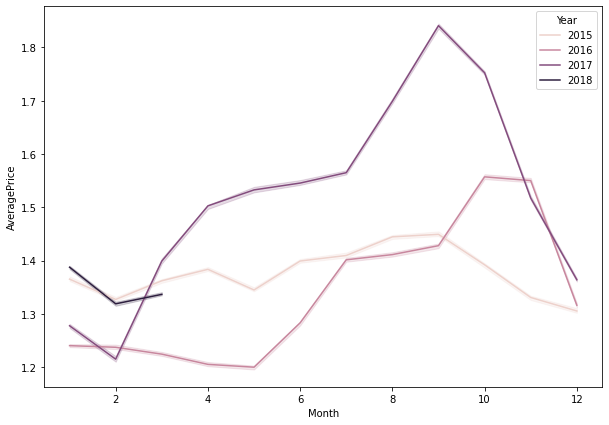

In [371]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Month',y='AveragePrice',hue='Year',ci=18,data=df)

### Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive. We have data for year 2018 till march only

In [372]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,27,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,20,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,13,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,29,2015


In [373]:
#We replace 2015 by 1 and 2016 by 2 for more simplicity
df['Year'].replace(2015,1,inplace=True)
df['Year'].replace(2016,2,inplace=True)
df['Year'].replace(2017,3,inplace=True)
df['Year'].replace(2018,4,inplace=True)

In [374]:
#we create a time column using year,month and day column and then drop these 3.
df['Time']=(df['Year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['Year','Month','Day'],axis=1,inplace=True)

In [375]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()
df['type']=ord.fit_transform(df['type'].values.reshape(-1,1))
df['region']=ord.fit_transform(df['region'].values.reshape(-1,1))

In [376]:
df.shape

(18249, 12)

### Removing Outliers

AveragePrice


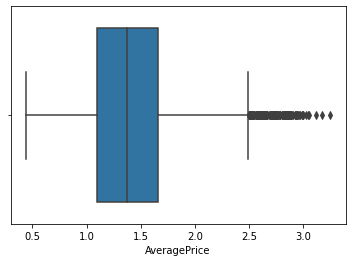

Total Volume


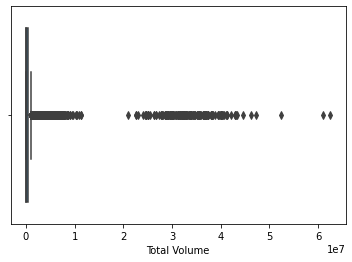

4046


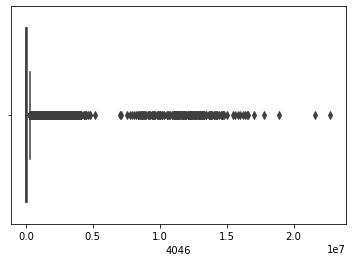

4225


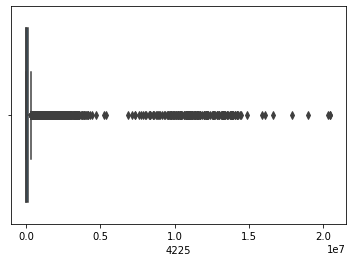

4770


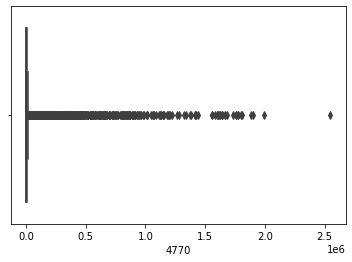

Total Bags


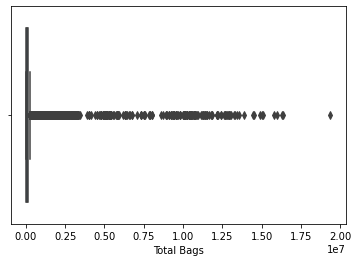

Small Bags


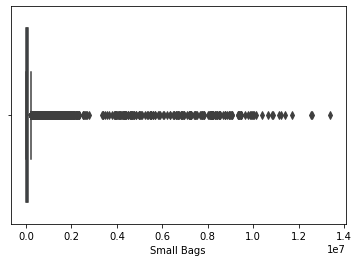

Large Bags


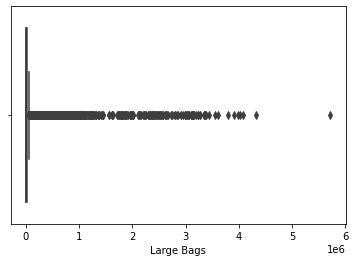

XLarge Bags


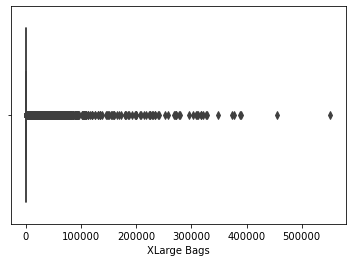

type


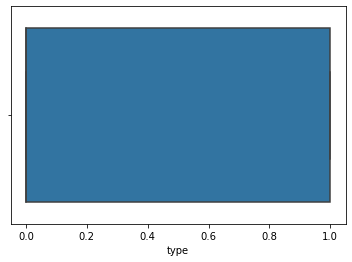

region


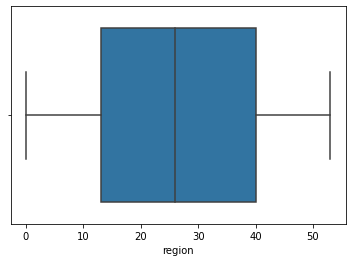

Time


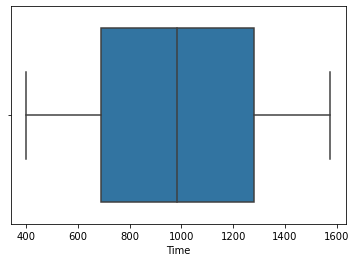

In [377]:
for i in df:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [378]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [379]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 3.28%
With threshold 3.01 data loss is 3.27%
With threshold 3.02 data loss is 3.19%
With threshold 3.03 data loss is 3.17%
With threshold 3.04 data loss is 3.14%
With threshold 3.05 data loss is 3.13%
With threshold 3.06 data loss is 3.12%
With threshold 3.07 data loss is 3.09%
With threshold 3.08 data loss is 3.07%
With threshold 3.09 data loss is 3.03%
With threshold 3.1 data loss is 3.0%
With threshold 3.11 data loss is 3.0%
With threshold 3.12 data loss is 2.95%
With threshold 3.13 data loss is 2.94%
With threshold 3.14 data loss is 2.89%
With threshold 3.15 data loss is 2.89%
With threshold 3.16 data loss is 2.88%
With threshold 3.17 data loss is 2.85%
With threshold 3.18 data loss is 2.84%
With threshold 3.19 data loss is 2.83%
With threshold 3.2 data loss is 2.81%
With threshold 3.21 data loss is 2.8%
With threshold 3.22 data loss is 2.78%
With threshold 3.23 data loss is 2.76%
With threshold 3.24 data loss is 2.73%
With threshold 3.25 data loss i

In [380]:
df=df[(z<3.57).all(axis=1)]

In [381]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,1524
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,1504


#### Removing Skewness

In [382]:
df.skew()

AveragePrice    0.489112
Total Volume    3.687319
4046            4.773721
4225            4.365749
4770            5.266465
Total Bags      4.111382
Small Bags      4.216424
Large Bags      5.410824
XLarge Bags     6.239287
type           -0.035187
region          0.009740
Time            0.009355
dtype: float64

In [383]:
cont=[ 'Total Volume', '4046', '4225','4770', 
           'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','Time']

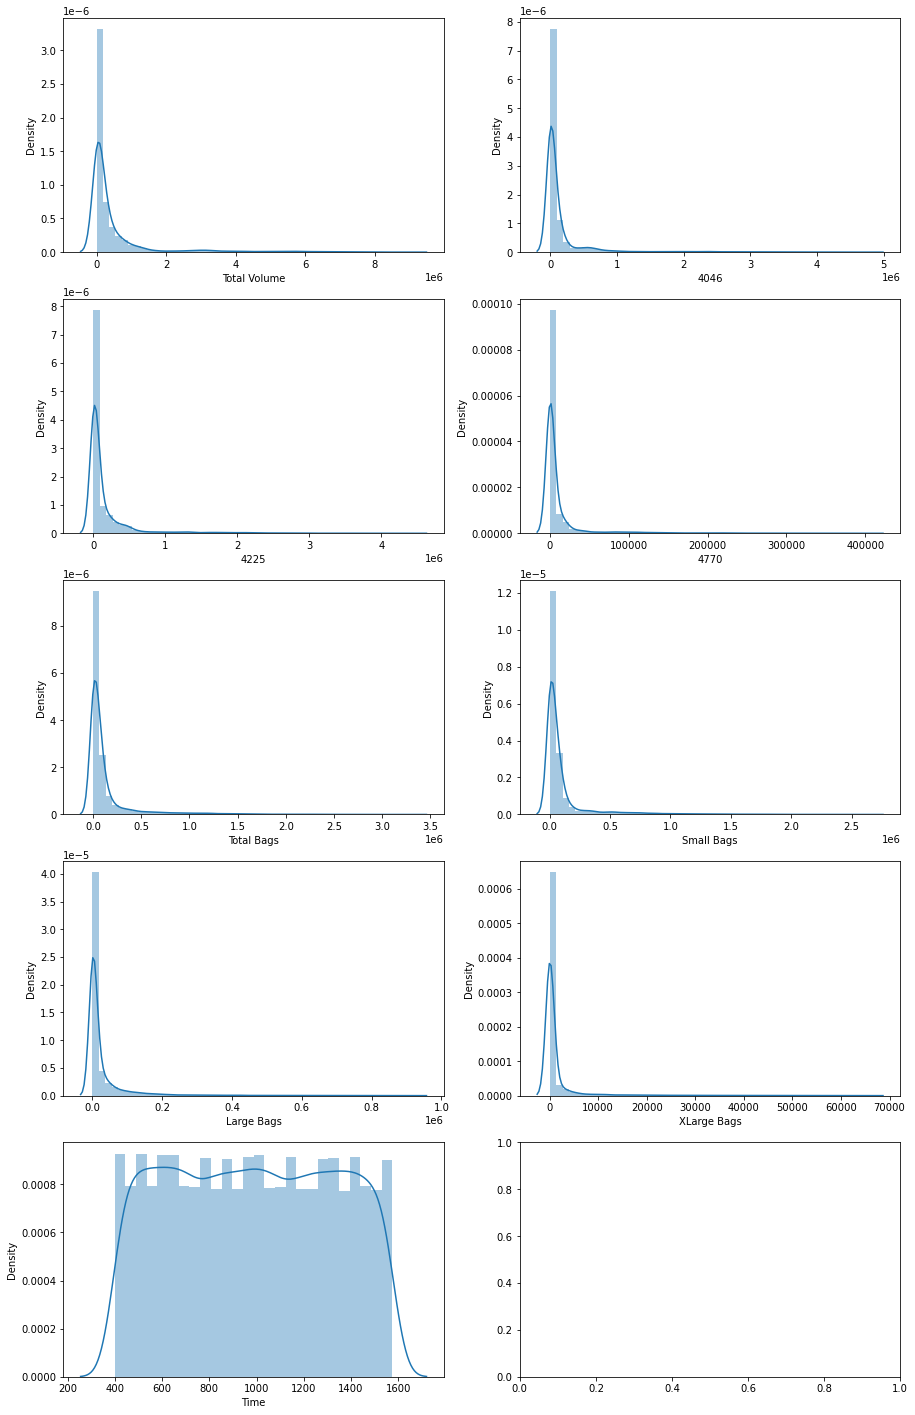

In [384]:
fig,ax=plt.subplots(5,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if r==4 and c==1:
        break
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

In [385]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [386]:
#We make use of power transformer to remove skewness from all columns except from Total volume as it was incapable
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='Total Volume':
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

# To remove skewness from total volume column we ise log transformation
df['Total Volume']=np.log(df['Total Volume'])

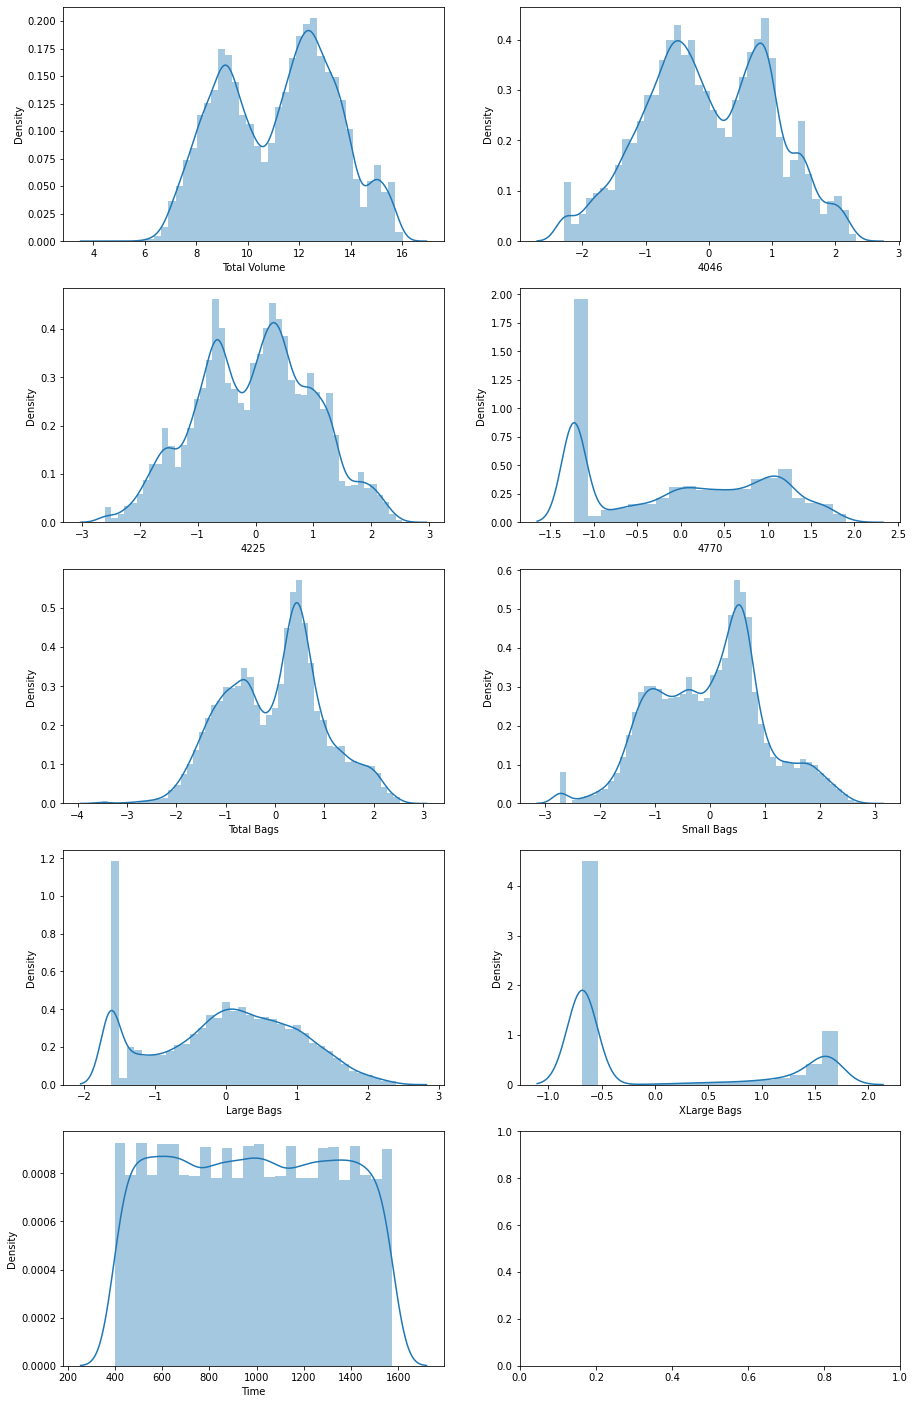

In [387]:
fig,ax=plt.subplots(5,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if r==4 and c==1:
        break
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

In [388]:
df.skew()

AveragePrice    0.489112
Total Volume   -0.032168
4046           -0.037678
4225           -0.042688
4770            0.025921
Total Bags     -0.019751
Small Bags     -0.022505
Large Bags     -0.107871
XLarge Bags     0.842951
type           -0.035187
region          0.009740
Time            0.009355
dtype: float64

##### skewness removed

In [389]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [390]:
from sklearn.model_selection import train_test_split,cross_val_score

In [391]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [392]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [393]:
models=[KNeighborsRegressor(),SVR(),LinearRegression(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [394]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [395]:
meanabs=[]
meansqd=[]
rootmeansqd=[]
r2=[]    
#Creating models
for model in (models):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        
        #Calculating scores of the model and appending them to a list
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        r2.append(np.round(r2_score(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))

    
    #Creating Dataframe
data=pd.DataFrame()
data['Model']=names
data['Mean Absolute Error']=meanabs
data['Mean Squared Error']=meansqd
data['Root Mean Squared Error']=rootmeansqd
data['R2_Score']=r2
data.set_index('Model',inplace = True)
print(data)

                           Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.2394              0.0965   
SVR                                     0.2636              0.1157   
LinearRegression                        0.2082              0.0712   
DecisionTreeRegressor                   0.1182              0.0342   
RandomForestRegressor                   0.0843              0.0152   
AdaBoostRegressor                       0.2066              0.0646   
GradientBoostingRegressor               0.1449              0.0370   
XGBRegressor                            0.0859              0.0139   

                           Root Mean Squared Error  R2_Score  
Model                                                         
KNeighborsRegressor                         0.3107   -0.2764  
SVR                                         0.3401   -5.9810  
LinearRegression                            0.2

In [396]:
data

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_Score
Model,,,,
KNeighborsRegressor,0.2394,0.0965,0.3107,-0.2764
SVR,0.2636,0.1157,0.3401,-5.9810
LinearRegression,0.2082,0.0712,0.2668,0.1819
DecisionTreeRegressor,0.1182,0.0342,0.1849,0.7878
RandomForestRegressor,0.0843,0.0152,0.1235,0.8872
AdaBoostRegressor,0.2066,0.0646,0.2542,0.2358
GradientBoostingRegressor,0.1449,0.0370,0.1924,0.6435
XGBRegressor,0.0859,0.0139,0.1179,0.9046


## XGBREGGRESSOR

In [403]:
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [405]:
Ypred=xgb.predict(xtest)

In [408]:
ytrain_pred=xgb.predict(xtrain)

In [409]:
print('Test data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(ytest,Ypred)),4))
print('R2 score: ', r2_score(ytest,Ypred))
print('Train data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(ytrain,ytrain_pred)),4))
print('R2 score: ', r2_score(ytrain,ytrain_pred))

Test data
RMSE : 0.1179
R2 score:  0.9142672031215646
Train data
RMSE : 0.0723
R2 score:  0.9664449015551033


Text(0.5, 1.0, 'XGBRegressor')

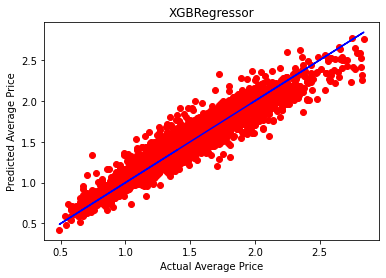

In [410]:
plt.scatter(x=ytest,y=Ypred,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

### Train Data

In [398]:
meanabs=[]
meansqd=[]
rootmeansqd=[]
r2=[]    
#Creating models
for model in (models):
        model.fit(xtrain,ytrain)
        train_p=model.predict(xtrain)
        
        #Calculating scores of the model and appending them to a list
        meanabs.append(np.round(mean_absolute_error(train_p,ytrain),4))
        meansqd.append(np.round(mean_squared_error(train_p,ytrain),4))
        r2.append(np.round(r2_score(train_p,ytrain),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(train_p,ytrain)),4))

    
    #Creating Dataframe
train_data=pd.DataFrame()
train_data['Model']=names
train_data['Mean Absolute Error']=meanabs
train_data['Mean Squared Error']=meansqd
train_data['Root Mean Squared Error']=rootmeansqd
train_data['R2_Score']=r2
train_data.set_index('Model',inplace = True)
print(train_data)

                           Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                     0.1922              0.0624   
SVR                                     0.2648              0.1146   
LinearRegression                        0.2080              0.0704   
DecisionTreeRegressor                   0.0000              0.0000   
RandomForestRegressor                   0.0317              0.0021   
AdaBoostRegressor                       0.2037              0.0627   
GradientBoostingRegressor               0.1406              0.0346   
XGBRegressor                            0.0539              0.0052   

                           Root Mean Squared Error  R2_Score  
Model                                                         
KNeighborsRegressor                         0.2498    0.2208  
SVR                                         0.3385   -6.2025  
LinearRegression                            0.2

In [399]:
train_data

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2_Score
Model,,,,
KNeighborsRegressor,0.1922,0.0624,0.2498,0.2208
SVR,0.2648,0.1146,0.3385,-6.2025
LinearRegression,0.2080,0.0704,0.2653,0.1760
DecisionTreeRegressor,0.0000,0.0000,0.0000,1.0000
RandomForestRegressor,0.0317,0.0021,0.0459,0.9851
AdaBoostRegressor,0.2037,0.0627,0.2504,0.2158
GradientBoostingRegressor,0.1406,0.0346,0.1860,0.6536
XGBRegressor,0.0539,0.0052,0.0723,0.9639


Text(0.5, 1.0, ' training data on XGBRegressor')

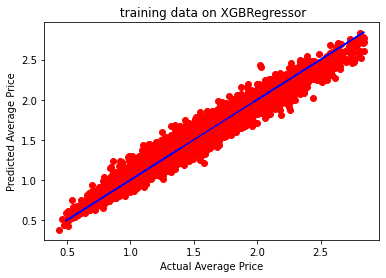

In [400]:
plt.scatter(x=ytrain,y=train_p,color='r')
plt.plot(ytest,ytest,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title(' training data on XGBRegressor')

In [401]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor()
model.fit(xtrain, ytrain)
Y_pred = model.predict(xtest)
score = model.score(xtrain, ytrain)
print('Training Score:', score)
score = model.score(xtest, ytest)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

Training Score: 0.9664449015551033
Testing Score: 0.9142672031215646


## so best optimum model is XGBRegressor which have low bias and low verience